# Credit Card Fraud Detection 

Goal of the project: Develop a Machine Learning model using historical credit card transaction data to predict whether future transactions are legitimate or fraudulent.

### Importing necessary libraries and data

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_card_data = pd.read_csv("creditcard.csv")

### Exploring the data

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking number of missing values in each of the columns

credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Checking the distribution on the column 'Class' for legit and fraudulent transactions
class_counts = credit_card_data['Class'].value_counts()
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

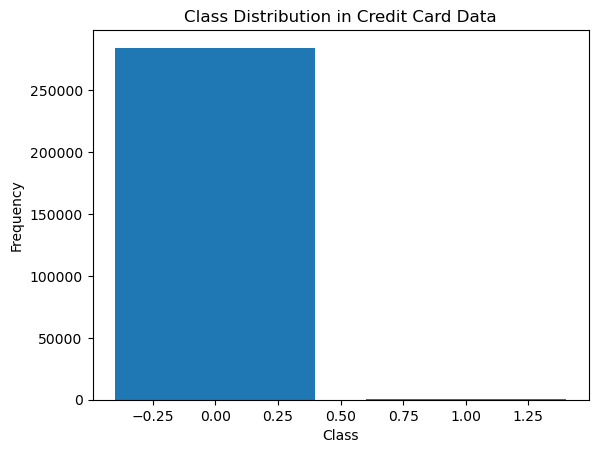

In [7]:
import matplotlib.pyplot as plt

# Visualizing column class
plt.bar(class_counts.index, class_counts.values)

# adding title and labels
plt.title('Class Distribution in Credit Card Data')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Show chart
plt.show()


As we can see, the dataset is quite unbalanced since there are way more legit transactions in the data set than fraudulent. The class can be interpret as follows: 
 * 0 -> Normal transaction (284315)
 * 1 -> Fraudulent transaction (492)

The next step will be to subset the data by the two classes for deeper analysis. 

### Subsetting Data for deeper analysis 

In [8]:
# Creating subsets
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [9]:
# Confirming the subset has been successful
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
# Statistical Analysis on the 'Amount' Column for legit subset
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
# Statistical Analysis on the 'Amount' Column for fraud subset
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# Comparing means for both transaction types
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under-Sampling

Since the dataset is highly imbalanced, I am going to create a sample dataset with an equal number of normal and fraudulent transactions, which we will then use to train the machine learning model. I am going to use the maximum of fraudulent transactions to create my sample of legit transactions (492).

In [13]:
legit_sample = legit.sample(n=492)

In [14]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [15]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
133388,80362.0,-0.589064,1.012214,0.417527,-0.330199,0.211320,-1.190687,0.610019,0.223884,-1.036414,...,0.268053,0.615210,0.090833,0.591737,-0.932396,-0.013011,0.048512,0.126544,6.98,0
135048,81085.0,1.212868,0.314473,0.280272,0.642528,-0.173938,-0.599932,0.017676,-0.072350,0.009880,...,-0.258437,-0.705438,0.157189,0.037345,0.147432,0.123681,-0.005811,0.027712,1.98,0
97213,66115.0,1.262289,1.245508,-1.907109,1.335240,1.319203,-1.027383,0.673515,-0.201142,-0.687920,...,-0.209926,-0.524736,-0.326541,-0.815006,0.946137,-0.261284,0.036612,0.079025,1.49,0
6685,8307.0,0.967032,-0.200891,1.386399,1.536015,-0.879157,0.450382,-0.832211,0.307218,1.884955,...,0.085032,0.493266,-0.067565,0.151777,0.295952,-0.283056,0.036983,0.024707,58.00,0
165162,117238.0,0.073138,0.838665,-0.096053,-0.947084,1.031043,-0.205600,0.927365,-0.033950,-0.338789,...,-0.268348,-0.589737,-0.079659,-1.024716,-0.360122,0.181764,0.246916,0.078375,1.78,0


In [16]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [17]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96349.008130,0.151940,-0.078580,-0.043766,0.024538,0.003988,0.059411,0.009830,-0.062308,-0.005465,...,-0.009362,0.076694,0.024198,-0.032407,-0.034731,-0.010962,-0.022815,-0.023782,-0.017152,99.480813
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Splitting the Data

In this section, I will split the data into independent variables (X) and the target variable (Y) for the next phase, which involves building the model."

In [18]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [19]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
133388,80362.0,-0.589064,1.012214,0.417527,-0.330199,0.211320,-1.190687,0.610019,0.223884,-1.036414,...,-0.174724,0.268053,0.615210,0.090833,0.591737,-0.932396,-0.013011,0.048512,0.126544,6.98
135048,81085.0,1.212868,0.314473,0.280272,0.642528,-0.173938,-0.599932,0.017676,-0.072350,0.009880,...,-0.104124,-0.258437,-0.705438,0.157189,0.037345,0.147432,0.123681,-0.005811,0.027712,1.98
97213,66115.0,1.262289,1.245508,-1.907109,1.335240,1.319203,-1.027383,0.673515,-0.201142,-0.687920,...,0.018393,-0.209926,-0.524736,-0.326541,-0.815006,0.946137,-0.261284,0.036612,0.079025,1.49
6685,8307.0,0.967032,-0.200891,1.386399,1.536015,-0.879157,0.450382,-0.832211,0.307218,1.884955,...,-0.168906,0.085032,0.493266,-0.067565,0.151777,0.295952,-0.283056,0.036983,0.024707,58.00
165162,117238.0,0.073138,0.838665,-0.096053,-0.947084,1.031043,-0.205600,0.927365,-0.033950,-0.338789,...,0.048041,-0.268348,-0.589737,-0.079659,-1.024716,-0.360122,0.181764,0.246916,0.078375,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [20]:
Y

133388    0
135048    0
97213     0
6685      0
165162    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

I will split the data to train the model, 20% of the data will be used for testing, and the remaining 80% will be used for training.

In [21]:
# Creating splits for training and testing the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,  stratify=Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### Building a model

In [23]:
model = LogisticRegression()

In [24]:
# Training the model 
model.fit(X_train, Y_train)

/Users/veronica/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Evaluating the model 

Calculating the accuracy score of the model

In [35]:
# Accuracy score on the training data

X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [36]:
print('Accuracy in training data: ', train_data_accuracy)

Accuracy in training data:  0.9491740787801779


In [38]:
# Accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [39]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249
